In [1]:
import math
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# data is n x d, where n is the number of samples and d the dimension
def sample_cov(m, data):
    n, d = data.shape
    mean = np.mean(data, axis=0)
    _, S, V = np.linalg.svd((data - mean) / math.sqrt(n), full_matrices=False)
    tmp = np.random.randn(m, min(n, d))
    return np.dot(tmp, np.dot(np.diag(S), V))

In [3]:
m = 300
n = 100
data_cov_diag = np.hstack([np.ones(10), np.zeros(10)])
d, = data_cov_diag.shape
data_cov = np.zeros((d, d))
np.fill_diagonal(data_cov, data_cov_diag)
data_cov[0,1] = 0.1
data_cov[1,0] = 0.1
data = np.random.multivariate_normal(mean=np.zeros(d), cov=data_cov, size=n)
res = sample_cov(m, data)

In [4]:
_, s, _ = np.linalg.svd((res - np.mean(res, axis=0)) / math.sqrt(m))
s

array([ 1.44587625,  1.23459139,  1.15654085,  1.09023948,  1.04831881,
        0.92345455,  0.88408647,  0.84155075,  0.7720506 ,  0.69522198,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [5]:
data_cov_diag

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

<IPython.core.display.Javascript object>


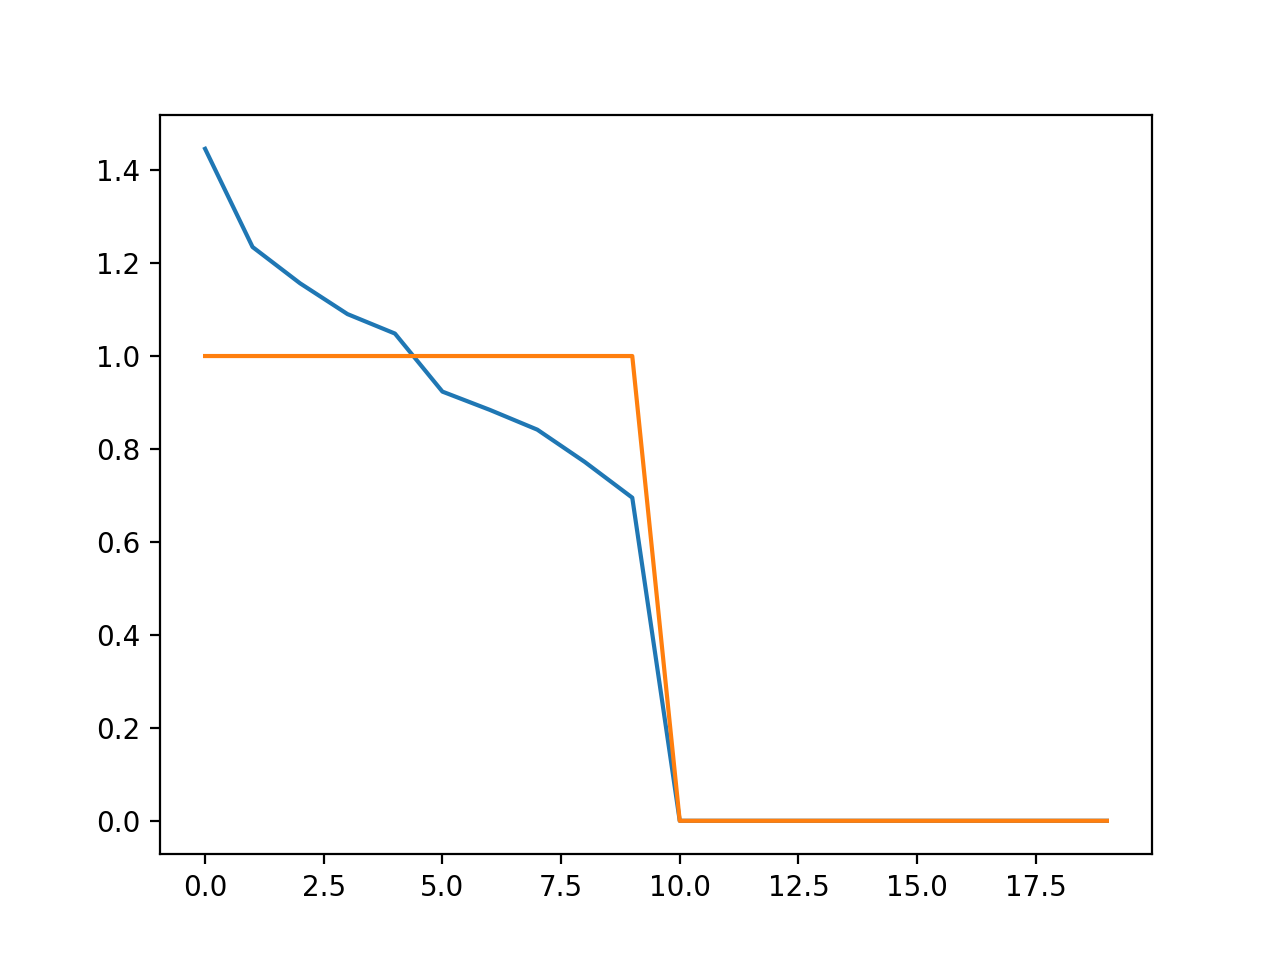

In [6]:
plt.figure()
plt.plot(s)
plt.plot(data_cov_diag)